In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


data = {'ID':[1,2,3,4,5,6],
       'Onion':[1,0,0,1,1,1],
       'Potato':[1,1,0,1,1,1],
       'Burger':[1,1,0,0,1,1],
       'Milk':[0,1,1,1,0,1],
       'Beer':[0,0,1,0,1,0]}
# print(data)

df = pd.DataFrame(data)
# print(df)

df = df[['ID', 'Onion', 'Potato', 'Burger', 'Milk', 'Beer' ]].astype(bool)
# print(df)

frequent_itemsets = apriori(df[['Onion', 'Potato', 'Burger', 'Milk', 'Beer' ]], min_support=0.50, use_colnames=True)
# print(frequent_itemsets)

num_itemsets = 1
rules = association_rules(frequent_itemsets,num_itemsets, metric='lift', min_threshold=1)
# print(rules)



In [4]:
rules [ (rules['lift'] >1.125)  & (rules['confidence']> 0.8)  ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Onion),(Potato),0.666667,0.833333,0.666667,1.0,1.2,1.0,0.111111,inf,0.500000,0.8,1.0,0.9
4,(Burger),(Potato),0.666667,0.833333,0.666667,1.0,1.2,1.0,0.111111,inf,0.500000,0.8,1.0,0.9
6,"(Burger, Onion)",(Potato),0.500000,0.833333,0.500000,1.0,1.2,1.0,0.083333,inf,0.333333,0.6,1.0,0.8


# Exemple 2

In [5]:
retail_shopping_basket = {'ID':[1,2,3,4,5,6],
                         'Basket':[['Beer', 'Diaper', 'Pretzels', 'Chips', 'Aspirin'],
                                   ['Diaper', 'Beer', 'Chips', 'Lotion', 'Juice', 'BabyFood', 'Milk'],
                                   ['Soda', 'Chips', 'Milk'],
                                   ['Soup', 'Beer', 'Diaper', 'Milk', 'IceCream'],
                                   ['Soda', 'Coffee', 'Milk', 'Bread'],
                                   ['Beer', 'Chips']
                                  ]
                         }
#print(retail_shopping_basket)

In [6]:
retail = pd.DataFrame(retail_shopping_basket)

retail = retail[['ID', 'Basket']]

#print(retail)
pd.options.display.max_colwidth=100

retail

,ID,Basket
0,1,"[Beer, Diaper, Pretzels, Chips, Aspirin]"
1,2,"[Diaper, Beer, Chips, Lotion, Juice, BabyFood, Milk]"
2,3,"[Soda, Chips, Milk]"
3,4,"[Soup, Beer, Diaper, Milk, IceCream]"
4,5,"[Soda, Coffee, Milk, Bread]"
5,6,"[Beer, Chips]"


In [7]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
pd.DataFrame(mlb.fit_transform(retail.Basket), columns=mlb.classes_)

,Aspirin,BabyFood,Beer,Bread,Chips,Coffee,Diaper,IceCream,Juice,Lotion,Milk,Pretzels,Soda,Soup
0,1,0,1,0,1,0,1,0,0,0,0,1,0,0
1,0,1,1,0,1,0,1,0,1,1,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,1,0,1,0
3,0,0,1,0,0,0,1,1,0,0,1,0,0,1
4,0,0,0,1,0,1,0,0,0,0,1,0,1,0
5,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [8]:
retail = retail.drop('Basket' ,axis=1).join(retail.Basket.str.join(',').str.get_dummies(','))
retail

,ID,Aspirin,BabyFood,Beer,Bread,Chips,Coffee,Diaper,IceCream,Juice,Lotion,Milk,Pretzels,Soda,Soup
0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0
1,2,0,1,1,0,1,0,1,0,1,1,1,0,0,0
2,3,0,0,0,0,1,0,0,0,0,0,1,0,1,0
3,4,0,0,1,0,0,0,1,1,0,0,1,0,0,1
4,5,0,0,0,1,0,1,0,0,0,0,1,0,1,0
5,6,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [12]:
frequent_itemsets_2 = apriori(retail.drop('ID', axis=1), use_colnames=True)
frequent_itemsets_2

C:\Users\marwane.boukili\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.666667,(Beer)
1,0.666667,(Chips)
2,0.500000,(Diaper)
3,0.666667,(Milk)
4,0.500000,"(Chips, Beer)"
5,0.500000,"(Diaper, Beer)"


In [15]:
association_rules(frequent_itemsets_2, num_itemsets=1,metric='lift')


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Chips),(Beer),0.666667,0.666667,0.5,0.75,1.125,1.0,0.055556,1.333333,0.333333,0.60,0.25,0.750
1,(Beer),(Chips),0.666667,0.666667,0.5,0.75,1.125,1.0,0.055556,1.333333,0.333333,0.60,0.25,0.750
2,(Diaper),(Beer),0.500000,0.666667,0.5,1.00,1.500,1.0,0.166667,inf,0.666667,0.75,1.00,0.875
3,(Beer),(Diaper),0.666667,0.500000,0.5,0.75,1.500,1.0,0.166667,2.000000,1.000000,0.75,0.50,0.875


In [19]:
association_rules(frequent_itemsets_2,num_itemsets=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Diaper),(Beer),0.5,0.666667,0.5,1.0,1.5,1.0,0.166667,inf,0.666667,0.75,1.0,0.875


# Exemple 3

In [25]:
movies = pd.read_csv('ml-latest-small/movies.csv')
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [150]:
movies_ohe = movies.drop('genres',axis=1).join(movies.genres.str.get_dummies())
pd.options.display.max_columns=100
movies_ohe.head()


,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [153]:
stat1 = movies_ohe.drop(['title', 'movieId'],axis=1).apply(pd.value_counts)

In [154]:
stat1 = stat1.transpose().drop(0,axis=1).sort_values(by=1, ascending=False).rename(columns={1:'No. of movies'})

In [161]:
stat2 = movies.join(movies.genres.str.split('|').reset_index().genres.str.len(), rsuffix='r').rename(columns={'genresr':'genre_count'})

In [162]:
stat2 = stat2[stat2['genre_count']==1].drop('movieId',axis=1).groupby('genres').sum().sort_values(by='genre_count', ascending=False).drop('title',axis=1)


In [163]:
stat = stat1.merge(stat2, how='left', left_index=True, right_index=True).fillna(0)


In [164]:
print(stat.columns)
stat.genre_count=stat.genre_count.astype(int)

stat.rename(columns={'genre_count': 'No. of movies with only 1 genre'},inplace=True)

Index(['No. of movies', 'genre_count'], dtype='object')


In [165]:

stat

,No. of movies,No. of movies with only 1 genre
Drama,34175,12443
Comedy,23124,7761
Thriller,11823,1410
Romance,10369,645
Action,9668,789
Documentary,9363,8132
Horror,8654,2487
(no genres listed),7080,7080
Crime,6976,295
Adventure,5402,316


Text(0.5, 1.0, 'distribution of number of genres')

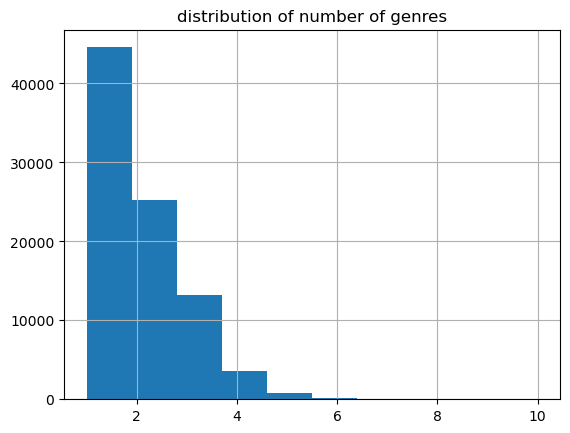

In [166]:
import matplotlib.pyplot as plt
%matplotlib inline
movies_ohe.set_index(['movieId','title']).sum(axis=1).hist()
plt.title('distribution of number of genres')

In [167]:
movies_ohe.set_index(['movieId','title'],inplace=True)


In [170]:
frequent_itemsets_movies = apriori(movies_ohe,use_colnames=True, min_support=0.025)


C:\Users\marwane.boukili\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [171]:
frequent_itemsets_movies


,support,itemsets
0,0.080836,((no genres listed))
1,0.110384,(Action)
2,0.061677,(Adventure)
3,0.052715,(Animation)
4,0.051607,(Children)
5,0.264018,(Comedy)
6,0.079648,(Crime)
7,0.106902,(Documentary)
8,0.390192,(Drama)
9,0.043969,(Fantasy)


In [173]:
rules_movies =  association_rules(frequent_itemsets_movies,num_itemsets=1, metric='lift', min_threshold=1.25)


In [174]:
rules_movies


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Thriller),(Action),0.134989,0.110384,0.032540,0.241056,2.183787,1.0,0.017639,1.172175,0.626674,0.152889,0.146885,0.267921
1,(Action),(Thriller),0.110384,0.134989,0.032540,0.294787,2.183787,1.0,0.017639,1.226595,0.609342,0.152889,0.184735,0.267921
2,(Comedy),(Romance),0.264018,0.118388,0.052543,0.199014,1.681034,1.0,0.021287,1.100659,0.550459,0.159288,0.091453,0.321418
3,(Romance),(Comedy),0.118388,0.264018,0.052543,0.443823,1.681034,1.0,0.021287,1.323288,0.459531,0.159288,0.244306,0.321418
4,(Crime),(Drama),0.079648,0.390192,0.042953,0.539278,1.382081,1.0,0.011874,1.323590,0.300378,0.100618,0.244479,0.324679
5,(Drama),(Crime),0.390192,0.079648,0.042953,0.110080,1.382081,1.0,0.011874,1.034196,0.453345,0.100618,0.033066,0.324679
6,(Thriller),(Crime),0.134989,0.079648,0.031364,0.232344,2.917120,1.0,0.020612,1.198911,0.759754,0.171131,0.165910,0.313061
7,(Crime),(Thriller),0.079648,0.134989,0.031364,0.393779,2.917120,1.0,0.020612,1.426890,0.714071,0.171131,0.299175,0.313061
8,(Drama),(Romance),0.390192,0.118388,0.067854,0.173899,1.468893,1.0,0.021660,1.067197,0.523468,0.153960,0.062966,0.373525
9,(Romance),(Drama),0.118388,0.390192,0.067854,0.573151,1.468893,1.0,0.021660,1.428625,0.362081,0.153960,0.300026,0.373525


In [175]:
rules_movies[(rules_movies.conviction>1.25)]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
3,(Romance),(Comedy),0.118388,0.264018,0.052543,0.443823,1.681034,1.0,0.021287,1.323288,0.459531,0.159288,0.244306,0.321418
4,(Crime),(Drama),0.079648,0.390192,0.042953,0.539278,1.382081,1.0,0.011874,1.323590,0.300378,0.100618,0.244479,0.324679
7,(Crime),(Thriller),0.079648,0.134989,0.031364,0.393779,2.917120,1.0,0.020612,1.426890,0.714071,0.171131,0.299175,0.313061
9,(Romance),(Drama),0.118388,0.390192,0.067854,0.573151,1.468893,1.0,0.021660,1.428625,0.362081,0.153960,0.300026,0.373525
11,(Horror),(Thriller),0.098807,0.134989,0.034732,0.351514,2.604020,1.0,0.021394,1.333893,0.683514,0.174477,0.250315,0.304404


In [176]:
rules_movies[(rules_movies.conviction>1.5)].sort_values(by=['lift','conviction'], ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


In [177]:
pd.options.display.max_rows=50


In [178]:
movies[(movies.genres.str.contains('Adventure')) & (movies.genres.str.contains('Children')) & (~movies.genres.str.contains('Animation'))]


,movieId,title,genres
1,2,Jumanji (1995),Adventure|Children|Fantasy
7,8,Tom and Huck (1995),Adventure|Children
55,56,Kids of the Round Table (1995),Adventure|Children|Comedy|Fantasy
59,60,"Indian in the Cupboard, The (1995)",Adventure|Children|Fantasy
105,107,Muppet Treasure Island (1996),Adventure|Children|Comedy|Musical
...,...,...,...
87254,291158,Windstorm 4 (2019),Adventure|Children|Drama
87326,291308,Lost Wilderness (2015),Adventure|Children
87327,291310,Moosie (1999),Adventure|Children
87400,291629,Monica and Friends: Lessons (2021),Adventure|Children|Comedy|Drama
